
--- Classification Report ---
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.60      0.67        20
           comp.graphics       0.76      0.80      0.78        20
 comp.os.ms-windows.misc       0.83      0.95      0.88        20
comp.sys.ibm.pc.hardware       0.68      0.85      0.76        20
   comp.sys.mac.hardware       0.94      0.75      0.83        20
          comp.windows.x       0.76      0.65      0.70        20
            misc.forsale       0.79      0.95      0.86        20
               rec.autos       0.80      1.00      0.89        20
         rec.motorcycles       0.94      0.75      0.83        20
      rec.sport.baseball       0.95      0.95      0.95        20
        rec.sport.hockey       0.91      1.00      0.95        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       0.87      0.65      0.74        20
                 sci.med       0.94      0.8

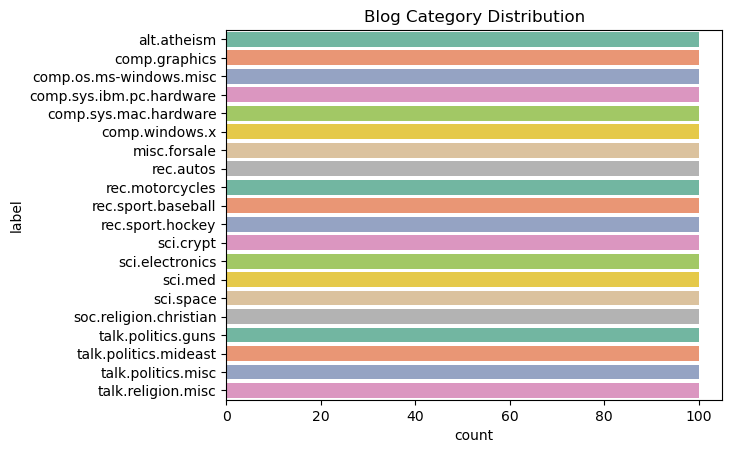

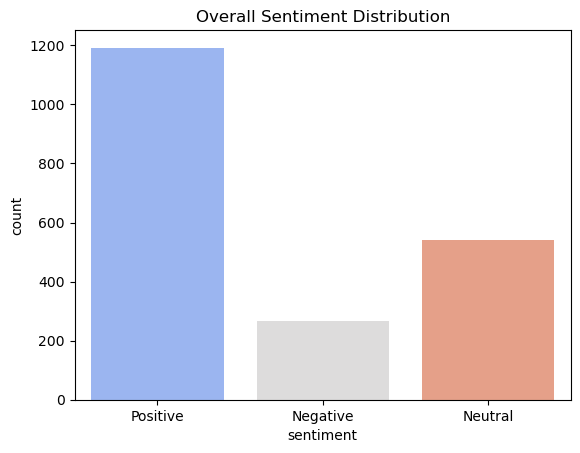

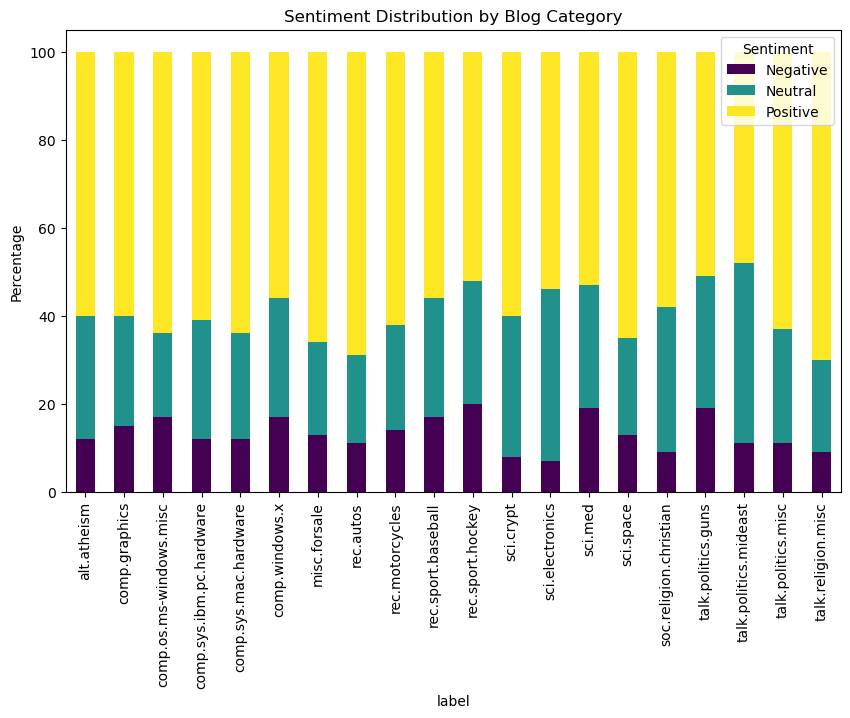

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob
from nltk.corpus import stopwords
import re
import nltk


df = pd.read_csv("blogs.csv")
df = df.rename(columns={"Data": "text", "Labels": "label"})

# Text Cleaning 
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    tokens = re.findall(r'\b[a-z]{2,}\b', text)  # regex-based word tokenizer
    words = [word for word in tokens if word not in stop_words]
    return " ".join(words)

df["cleaned_text"] = df["text"].apply(clean_text)

# TF-IDF 
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["label"]

# rain/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Naive Bayes Classifier 
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred))

#  Sentiment Analysis 
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(get_sentiment)

#  Visualization 

# Blog label distribution
sns.countplot(data=df, y="label", palette="Set2")
plt.title("Blog Category Distribution")
plt.show()

# Sentiment distribution
sns.countplot(data=df, x="sentiment", palette="coolwarm")
plt.title("Overall Sentiment Distribution")
plt.show()

# Sentiment by label
sentiment_dist = pd.crosstab(df["label"], df["sentiment"], normalize="index") * 100
sentiment_dist.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Sentiment Distribution by Blog Category")
plt.ylabel("Percentage")
plt.legend(title="Sentiment")
plt.show()
